In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Churning is the loss of clients or customers

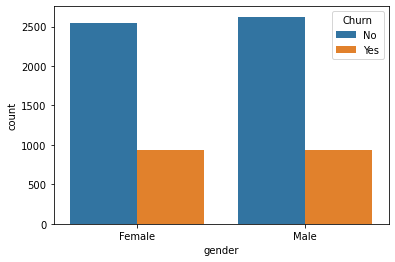

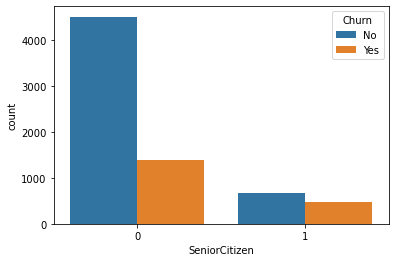

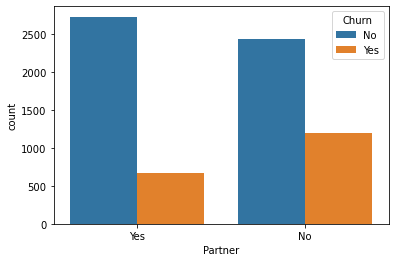

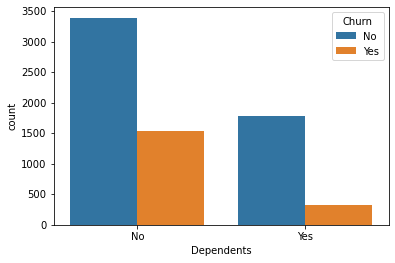

In [7]:
demographic=df.iloc[:,1:5]
for demo in demographic:
    sns.countplot(x=demo,hue='Churn',data=df)
    plt.show()

1a) Dependents particularly no dependents and senior citizen particularly not a senior citizen

1b)They should target the advertisements to those customers with no dependents and those with no partners since they have a high count of churners

In [8]:
yes_churn=df[df['Churn']=='Yes']
no_churn=df[df['Churn']=='No']

In [9]:
yes_churn.groupby(['SeniorCitizen','gender','Partner','Dependents'])['Churn'].count()

SeniorCitizen  gender  Partner  Dependents
0              Female  No       No            429
                                Yes            32
                       Yes      No            114
                                Yes           124
               Male    No       No            418
                                Yes            43
                       Yes      No            128
                                Yes           105
1              Female  No       No            158
                                Yes             1
                       Yes      No             73
                                Yes             8
               Male    No       No            118
                                Yes             1
                       Yes      No            105
                                Yes            12
Name: Churn, dtype: int64

In [10]:
no_churn.groupby(['SeniorCitizen','gender','Partner','Dependents'])['Churn'].count()

SeniorCitizen  gender  Partner  Dependents
0              Female  No       No            909
                                Yes           110
                       Yes      No            482
                                Yes           720
               Male    No       No            963
                                Yes           168
                       Yes      No            439
                                Yes           717
1              Female  No       No            159
                                Yes             2
                       Yes      No            136
                                Yes            31
               Male    No       No            126
                                Yes             4
                       Yes      No            176
                                Yes            32
Name: Churn, dtype: int64

Telco brand is popular among female and males who are non senior citizens with no partners and no dependents

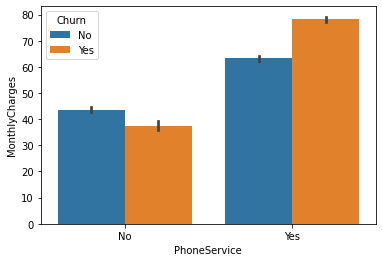

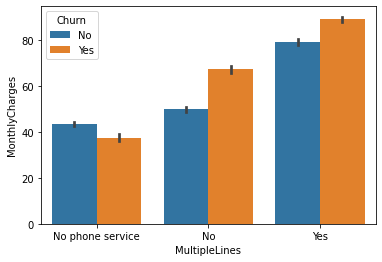

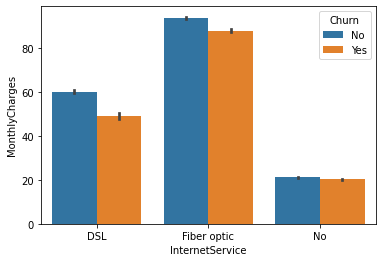

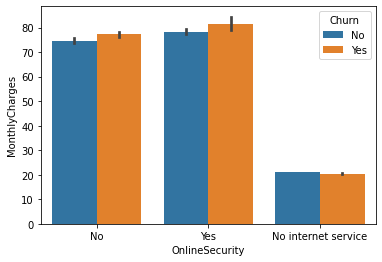

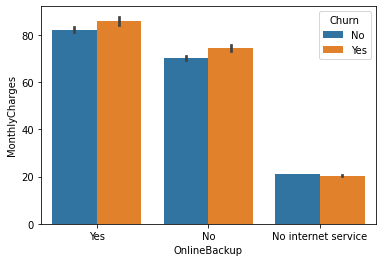

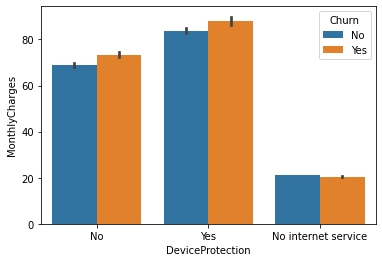

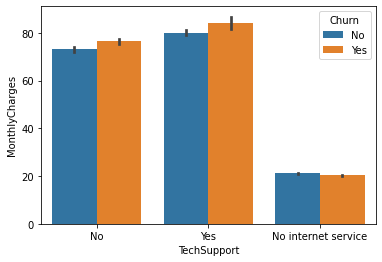

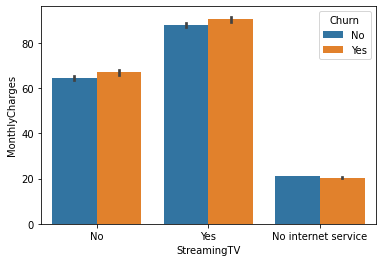

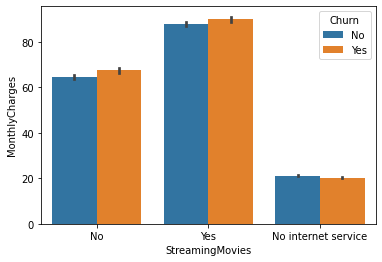

In [11]:
services=df.iloc[:,6:15]
for service in services:
    sns.barplot(x=service,y='MonthlyCharges',hue='Churn',data=df)
    plt.show()

2a)Streaming movies ,streaming tv,Tech Support

In [12]:
phoneservice=df.groupby(['PhoneService','Churn']) ['Contract'].value_counts()
phoneservice

PhoneService  Churn  Contract      
No            No     Month-to-month     223
                     Two year           158
                     One year           131
              Yes    Month-to-month     153
                     One year            14
                     Two year             3
Yes           No     Month-to-month    1997
                     Two year          1489
                     One year          1176
              Yes    Month-to-month    1502
                     One year           152
                     Two year            45
Name: Contract, dtype: int64

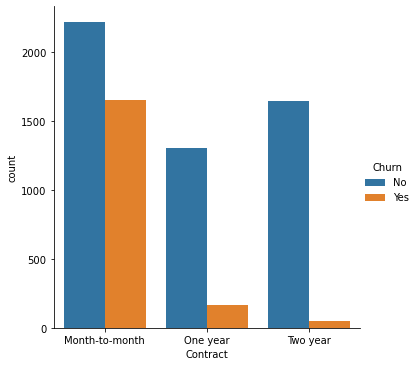

In [13]:
sns.catplot(x='Contract',data=df,hue='Churn',kind='count')

2b)The month to month contract would encourage customer retention

In [14]:
no_churn['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

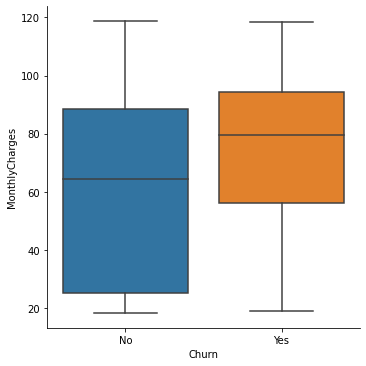

In [15]:
sns.catplot(x='Churn',y='MonthlyCharges',kind='box',data=df)

<AxesSubplot:ylabel='MonthlyCharges'>

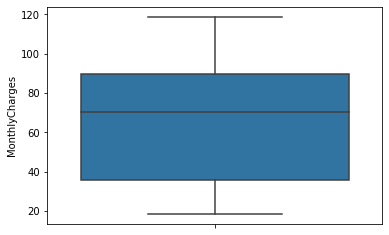

In [16]:

sns.boxplot(y='MonthlyCharges',data=df)

3a)for the basic package 18.25 for the plus 64.42 for the premium 118.75
             

In [17]:
df.groupby(['PaperlessBilling'])['Churn'].value_counts()

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='MonthlyCharges'>

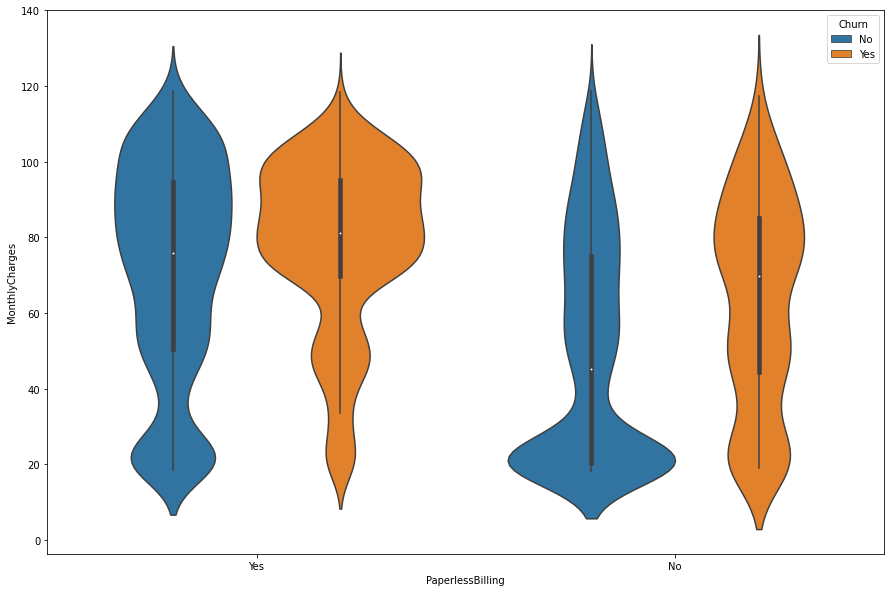

In [18]:
plt.figure(figsize=(15,10))
sns.violinplot(x='PaperlessBilling',y='MonthlyCharges',hue='Churn',data=df)

3b)The company should not go completely paperless since they have a significant number of customers who do not use paperless billing and do not churn.